<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Book%201/Chap04/2.NumericalDifferentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical differentiation

$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}\frac{f( x + h) - f(x)}{h}
$$  

미분의 식을 보면 분모에 있는 시간과 같은 역할을 하는 `h`를 0에 가깝게 한다는 의미를 나타낸다.

In [ ]:
# bad implementation
def numerical_diff(f, x):
  h = 10e-50

  return (f(x + h) - f(x)) / h

## Improvements

위처럼 수치 미분을 구현하면 2가지 개선점이 존재한다.

1. 반올림 오차
단순히 매우 작은 값을 분모에 넣게된다면 **반올림 오차(rounding error)**가 발생한다.  
즉 매우 작은 값이 생략되어 최종 결과에 오차가 발생한다.  
```python
np.float32(10e-50)
# output : 0.0
```  
따라서 일반적으로 매우 작은 값으로 10e-4를 활용한다.  

2. 함수 f의 차분(값들의 차이)
'진정한 미분'은 x 위치의 함수의 기울이지만, 위의 구현에서는 (x+h)와 x사이의 기울기이다.  
즉 값이 엄밀하지 않다.  
h를 완벽하게 0으로 좁히는 것이 불가능해 생기는 문제이다.

## Solution

### 중앙 차분, 중심 차분
오차를 줄이기 위해 $(x + h)$와 $(x - h)$일 때의 함수 $f$의 차분을 계산한다.  
이런 방법을 **중심 차분**,**중앙 차분** 

In [2]:
def numerical_diff(f, x):
  h = 1e-4  # 0.0001
  return (f(x + h) - f(x - h)) / (2 * h)

## Example

$$
y = 0.01x^2 + 0.1x
$$  

위의 식을 이용해서 수치 미분 예제를 해보자. 아래 값이 나와야한다.

$$
\frac{df(x)}{dx} = 0.02x + 0.1
$$

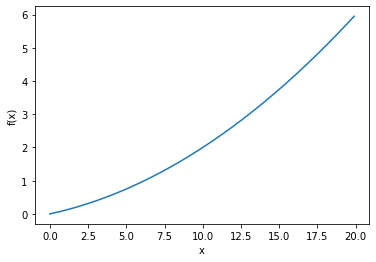

In [8]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [9]:
# calculate numerical differentiation
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


# Partial differentiation

인수들의 제곱 합을 계산하는 식을 보자.

$$
f(x_0, x_1) = {x_{0}}^2 + {x_{1}}^2
$$

In [10]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # or return np.sum(x**2)

이 식을 미분할 때 어떤 변수를 기준으로 미분하는가를 결정해야하는데,  
이를 편미분을 사용하면 할 수 있다.

In [14]:
# partial differntiation by x0
def function_tmp1(x0):
  return x0 * x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

# partial differntiation by x1
def function_tmp2(x1):
  return 3.0 ** 2.0 + x1 * x1

print(numerical_diff(function_tmp2, 4.0))  

6.00000000000378
7.999999999999119


무슨 함수를 넣은건가 생각이 들지만 편미분 성질에 의해서 `function_tmp1`은 x0만 변수를 살린 것이고 `function_tmp2`는 x1만 변수를 살린 것이다.